In [74]:
import numpy as np
from commonfunctions import *
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray , rgba2rgb
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local ,   threshold_sauvola
from skimage.filters.rank import median
from skimage.morphology import disk

In [111]:
def binarize_sauvola(img):
    if len(img.shape) > 2 :
        img = (rgb2gray(img)*255).astype("uint8")
    #thresh_local = threshold_local(img, , offset=3)
    thresh_sauvola = threshold_sauvola(img, 31)
    return img >= thresh_sauvola  

def binarize_local(image):
    image = (rgb2gray(image)*255).astype("uint8")
    block_size = 9
    local_thresh = threshold_local(image, block_size, offset= 3)
    binary_local = (image > local_thresh).astype(np.uint8)
    binary_local = median(binary_local, disk(1))
    return binary_local

    

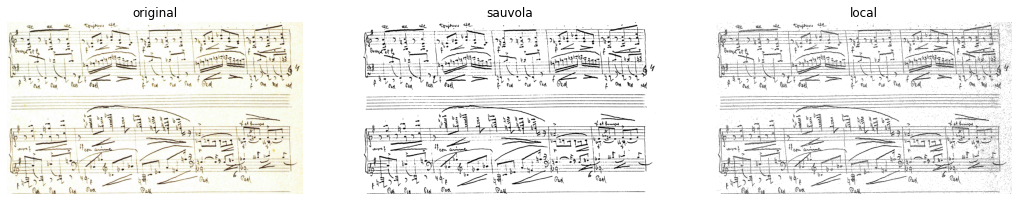

In [112]:
image = io.imread("sample5.jpg")
local = binarize_local(image)
sauvola = binarize_sauvola(image)
show_images([image ,  sauvola , local] , ["original","sauvola" , "local"] )


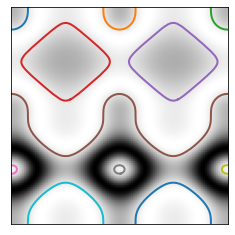

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()